In [1]:
import pandas as pd
import icecream as ic
import numpy as np
import plotly
import matplotlib as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# from chemicalchecker import ChemicalChecker
# cc = ChemicalChecker()
from standardiser import unsalt, neutralise
import e3fp
from e3fp.pipeline import confs_from_smiles


import six

import warnings

import sys
import re
import random
 
from ipywidgets import HTML

import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (450, 200)
PandasTools.RenderImagesInAllDataFrames()

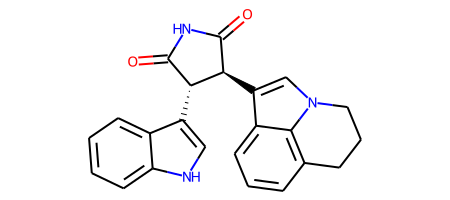

In [2]:
Acetazolamide = "CC(=O)NC1=NN=C(S1)S(=O)(=O)N"
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

https://chemicalchecker.org/explore/BZKPWHYZMXOIDC-UHFFFAOYSA-N

<h2>Standardization

In [6]:
#Using standardizer (https://github. com/flatkinson/standardiser)
#unsalt
non_salt_frags = []

for frag in Chem.GetMolFrags(mol, asMols=True):
    if unsalt.is_nonorganic(frag): continue # Looks for any 'non-organic' element
    if unsalt.is_salt(frag): continue       # Uses salt dictionary
    non_salt_frags.append(frag)
    
Draw.MolsToGridImage(non_salt_frags)

#neuralise

mol = neutralise.run(non_salt_frags[0])

#Tautemers
show_change(Acetazolamide)


NameError: name 'show_change' is not defined

In [7]:
#outputing Inchikey after standardization
from rdkit.Chem import inchi
inchikey = inchi.MolToInchiKey(mol)

A1: 2D fingerprints

In [61]:
#morgan finger print with radius of 2
morgan_fp = AllChem.GetMorganFingerprint(mol,2)




2022-09-27 18:18:38,399|INFO|Generating conformers for Acetazolamide.
2022-09-27 18:18:38,722|INFO|Generated 3 conformers for Acetazolamide.
2022-09-27 18:18:38,730|INFO|Generating fingerprints for Acetazolamide.
2022-09-27 18:18:38,904|INFO|Generated 3 fingerprints for Acetazolamide.


A2: 3D fingerprints

In [37]:
#3D fingerprints. The 1,024-bit E3FP fingerprints 
from e3fp.config.params import read_params
from e3fp.pipeline import fprints_from_mol

config = read_params("e3fp/new_params.cfg")

confgen_params = {'max_energy_diff': 20.0, 'first': 3}
fprint_params = {'bits': 1024, 'radius_multiplier': 2, 'rdkit_invariants': True}

conformer = confs_from_smiles(Acetazolamide, "Acetazolamide", confgen_params=confgen_params)
# conformer.GetNumConformers()

fprints = fprints_from_mol(conformer, fprint_params=fprint_params)

2022-09-29 14:37:02,173|INFO|Generating conformers for Acetazolamide.
2022-09-29 14:37:02,499|INFO|Generated 3 conformers for Acetazolamide.
2022-09-29 14:37:02,502|INFO|Generating fingerprints for Acetazolamide.
2022-09-29 14:37:02,648|INFO|Generated 3 fingerprints for Acetazolamide.


A3: scaffolds

In [38]:
#Murcko’s scaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol,MakeScaffoldGeneric

Mscaffold = Chem.MolToSmiles(GetScaffoldForMol(mol))
# Chem.MolToSmiles(Mscaffold)
#molecular framework
mol_Mscaffold = Chem.MolFromSmiles(Mscaffold)
fw = MakeScaffoldGeneric(mol)

A4: structural keys

In [95]:
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

fps = MACCSkeys.GenMACCSKeys(mol)


A5: physicochemical parameters

In [44]:
from rdkit.Chem import Descriptors, rdMolDescriptors, rdchem, Crippen,Lipinski
from rdkit.Chem.rdchem import StereoType
#molecular weight, 
mw = Descriptors.ExactMolWt(mol)

# number of heavy atoms
nHeavy = rdMolDescriptors.CalcNumHeavyAtoms(mol)
# number of heteroatoms
nHetero = rdMolDescriptors.CalcNumHeteroatoms(mol) 
# number of rings
nRing = rdMolDescriptors.CalcNumRings(mol) 
# number of aliphatic rings 
nAliphatic = rdMolDescriptors.CalcNumAliphaticRings(mol)
# number of aromatic rings

nAromatic = rdMolDescriptors.CalcNumAromaticRings(mol)

# number of hydrogen bond acceptors
nHBA = rdMolDescriptors.CalcNumHBA(mol)

#! GetNumBonds
#nAliphatic = rdchem.GetBonds(mol)
# double = StereoType.Bond_Double(mol)
rotatable = Lipinski.NumRotatableBonds(mol)
nBond =rotatable #+ double 
# number of hydrogen bond donors 
nHBD = rdMolDescriptors.CalcNumHBD(mol)

# number of rotatable bonds
nRotatable = rdMolDescriptors.CalcNumRotatableBonds(mol)

# logP
logP = Crippen.MolLogP(mol)

#! molecular refractivity


# polar surface area

psurface = rdMolDescriptors.CalcTPSA(mol)


#Lipinski’s rule-of-five violations
# Molecular weight <= 500
# LogP <= 5
# H-bond donor count <= 5
# H-bond acceptor count <= 10
rule_of_five = [mw <= 500,logP <= 5,nHBD <=5,nHBA <=5]
r5 = all(item is True for item in rule_of_five)

#rule-of-three violations
# molecular weight of a fragment is <300
# the v is ≤3
# the number of hydrogen bond donors is ≤3
# the number of hydrogen bond acceptors is ≤3.
rule_of_three = [mw <= 300,logP <= 3,nHBD <=3,nHBA <=3]
r3 = all(item is True for item in rule_of_three)

#chemical beauty (QED)
from qed import qed
QED = qed.weights_max(mol)